# Plot of Presence or Absence of Cloud

In [1]:
import numpy as np

In [2]:
data1 = np.loadtxt("../data/image_data/image1.txt")

In [3]:
# keep only first three columns
data1 = data1[:,:3]

In [4]:
data1

array([[373.,  65.,  -1.],
       [374.,  65.,  -1.],
       [375.,  65.,  -1.],
       ...,
       [381., 369.,   0.],
       [382., 369.,   0.],
       [383., 369.,   0.]])

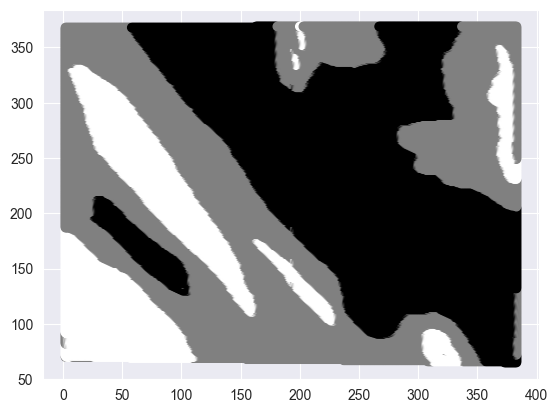

In [5]:
# Plot data, first column is x coordinate, second column is y coordinate, third column is binary label
# +1: white, -1: black, 0: grey

import matplotlib.pyplot as plt

color_map = {1: 'white', -1: 'black', 0: 'grey'}
colors = [color_map[pixel] for pixel in data1[:,2]]

plt.scatter(data1[:,0], data1[:,1], c=colors)

plt.show()

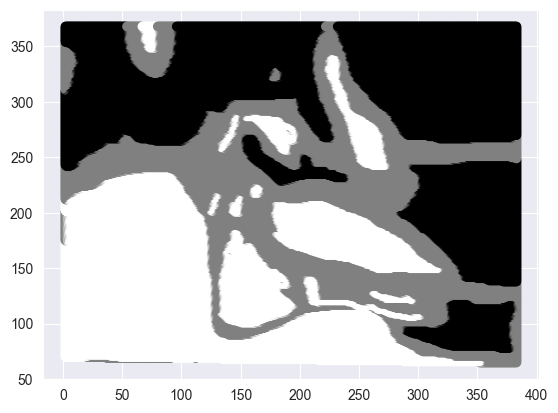

In [6]:
data2 = np.loadtxt("../data/image_data/image2.txt")
data2 = data2[:,:3]

colors = [color_map[pixel] for pixel in data2[:,2]]

plt.scatter(data2[:,0], data2[:,1], c=colors)
plt.show()

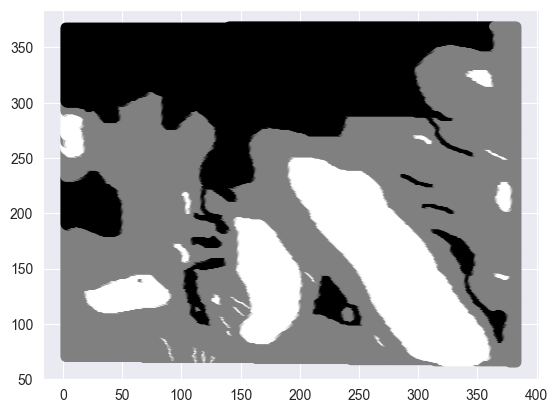

In [7]:
data3 = np.loadtxt("../data/image_data/image3.txt")
data3 = data3[:,:3]

colors = [color_map[pixel] for pixel in data3[:,2]]

plt.scatter(data3[:,0], data3[:,1], c=colors)
plt.show()

# Explore the relationships between the radiances of different angles

In [8]:
data1 = np.loadtxt("../data/image_data/image1.txt")
data2 = np.loadtxt("../data/image_data/image2.txt")
data3 = np.loadtxt("../data/image_data/image3.txt")

data = np.concatenate((data1, data2, data3), axis=0)
data

array([[373.     ,  65.     ,  -1.     , ..., 251.83549, 233.98555,
        219.14351],
       [374.     ,  65.     ,  -1.     , ..., 252.11003, 234.83566,
        218.55107],
       [375.     ,  65.     ,  -1.     , ..., 251.78252, 233.68451,
        219.4614 ],
       ...,
       [381.     , 369.     ,   0.     , ..., 237.82912, 215.75751,
        194.43245],
       [382.     , 369.     ,   0.     , ..., 234.09392, 213.71532,
        205.44537],
       [383.     , 369.     ,   0.     , ..., 237.12109, 214.87849,
        221.20497]])

In [9]:
# remove rows with label 0
data = data[data[:,2] != 0]
data

array([[373.     ,  65.     ,  -1.     , ..., 251.83549, 233.98555,
        219.14351],
       [374.     ,  65.     ,  -1.     , ..., 252.11003, 234.83566,
        218.55107],
       [375.     ,  65.     ,  -1.     , ..., 251.78252, 233.68451,
        219.4614 ],
       ...,
       [361.     , 369.     ,  -1.     , ..., 244.37474, 218.71243,
        201.06718],
       [362.     , 369.     ,  -1.     , ..., 244.00386, 218.9677 ,
        201.26225],
       [363.     , 369.     ,  -1.     , ..., 243.50777, 219.4903 ,
        200.92751]])

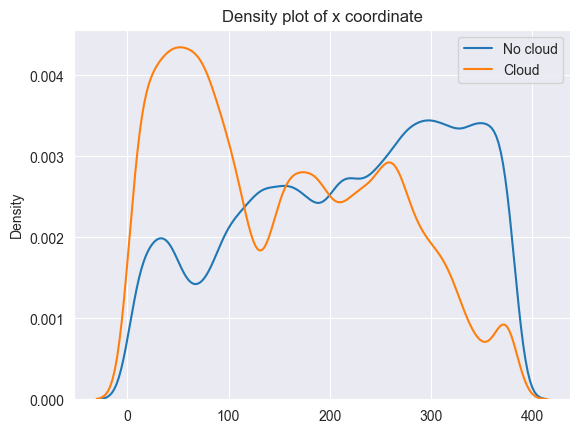

In [10]:
import seaborn as sns

sns.kdeplot(data[:,0][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,0][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of x coordinate")
plt.show()


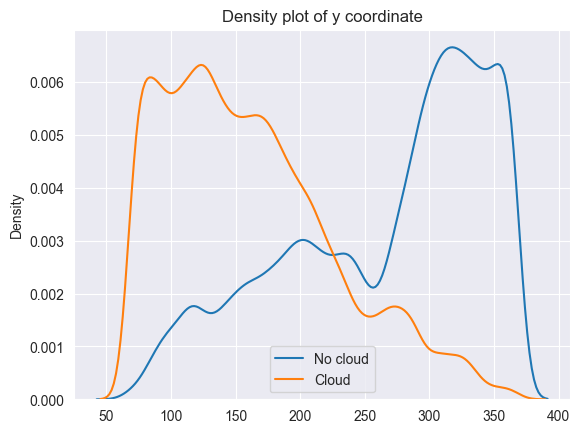

In [11]:
sns.kdeplot(data[:,1][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,1][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of y coordinate")
plt.show()

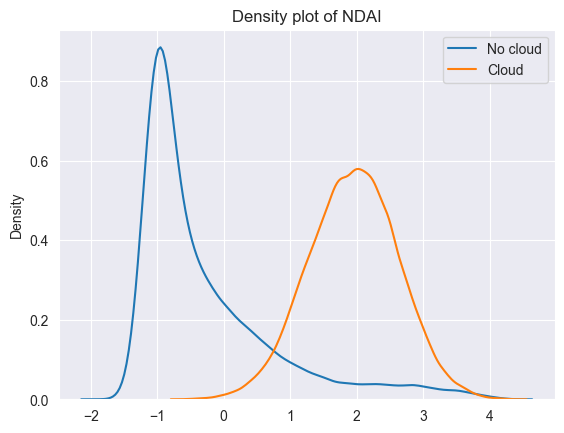

In [12]:
sns.kdeplot(data[:,3][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,3][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of NDAI")
plt.show()

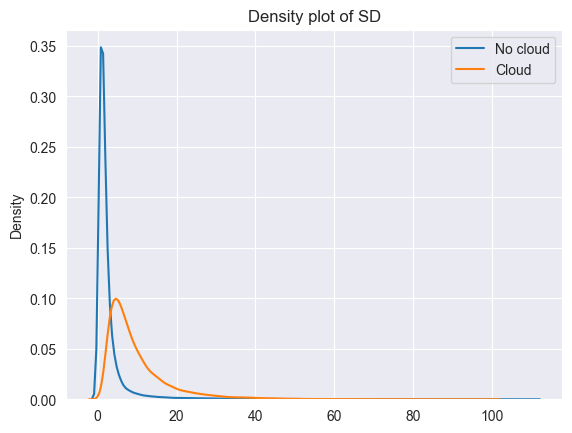

In [13]:
sns.kdeplot(data[:,4][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,4][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of SD")
plt.show()

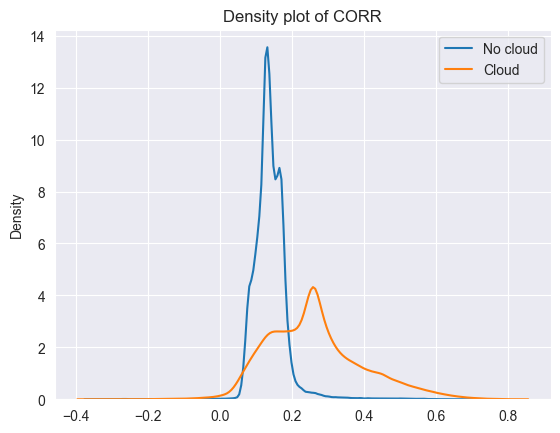

In [14]:
sns.kdeplot(data[:,5][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,5][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of CORR")
plt.show()

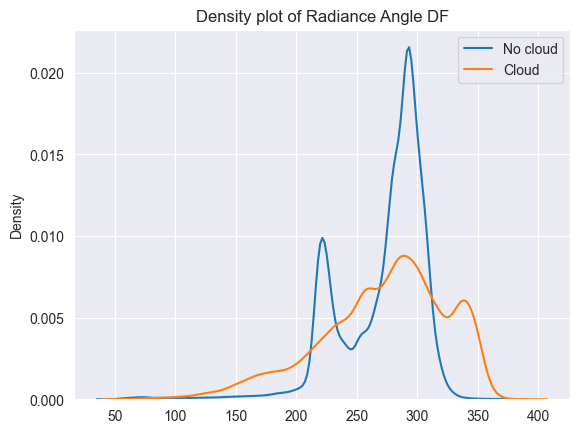

In [15]:
sns.kdeplot(data[:,6][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,6][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of Radiance Angle DF")
plt.show()

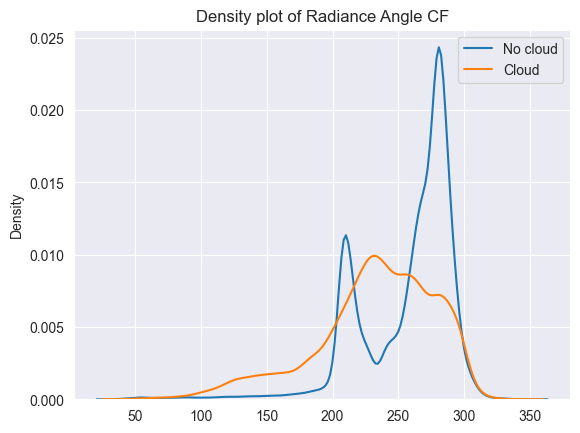

In [16]:
sns.kdeplot(data[:,7][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,7][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of Radiance Angle CF")
plt.show()

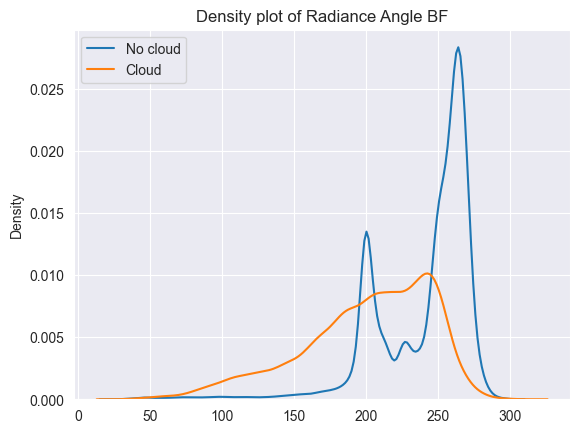

In [17]:
sns.kdeplot(data[:,8][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,8][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of Radiance Angle BF")
plt.show()

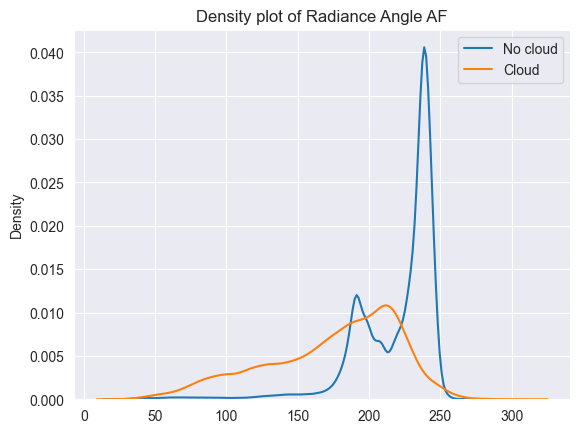

In [18]:
sns.kdeplot(data[:,9][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,9][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of Radiance Angle AF")
plt.show()

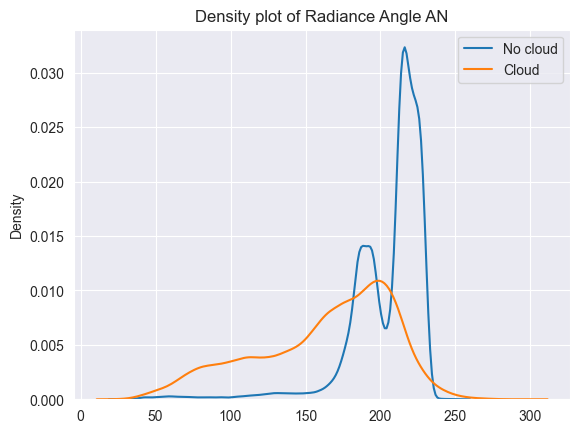

In [19]:
sns.kdeplot(data[:,10][np.where(data[:,2] == -1)], label="No cloud")
sns.kdeplot(data[:,10][np.where(data[:,2] == 1)], label="Cloud")
plt.legend()
plt.title("Density plot of Radiance Angle AN")
plt.show()